# 0) Load libraries

enviar email com relação forma funcional - interpretação de paraâmetros:  renzors@al.insper.edu.br

In [1]:
# Core
import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]

import graphviz
import seaborn as sns


# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split



# If you are in google Colab ...
# from google.colab import files
# import io

# I - Data

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Load Data and get a first look

In [2]:
df = pd.read_csv('../data/house_prices/train.csv')

train, test = train_test_split(df, test_size=0.3)

train.head()
#train.info()
#type(train)

# If you are in Google Colab...
# Run:
# uploaded = files.upload()
# An then: 
#train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
379,380,60,RL,60.0,8123,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,179000
1366,1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
507,508,20,FV,75.0,7862,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,208300
256,257,60,FV,64.0,8791,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,207500
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500


Column Names

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Describe
Generate descriptive statistics. The function pd.describe "Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values."

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,847.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1017.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,747.438356,58.023483,70.008264,10717.684932,6.133072,5.555773,1970.954012,1984.594912,109.170108,453.630137,...,92.899217,45.817025,23.716243,2.959883,16.925636,2.115460,52.039139,6.375734,2007.817025,181991.249511
std,419.566643,42.747321,23.695840,11297.903762,1.386200,1.120690,30.271977,20.506904,192.701545,441.431835,...,124.965518,65.322651,64.442320,28.173614,60.006597,33.804363,579.367556,2.712419,1.319181,79228.726384
min,2.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,386.250000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131500.000000
50%,758.500000,50.000000,69.000000,9552.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,403.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164945.000000
75%,1114.750000,70.000000,80.000000,11698.500000,7.000000,6.000000,2000.000000,2003.000000,169.000000,733.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,576.000000,15500.000000,12.000000,2010.000000,755000.000000


Check data type of each column

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

For example...

#### For simplicity when growing the trees, I will only use 'int64' variables:

In [6]:
#train = train.select_dtypes(include = 'int64')
#train.describe()

#### Just reordering the dataframe to begin with or response variable

In [7]:
cols_to_order = ['SalePrice']
new_columns = cols_to_order + (train.columns.drop(cols_to_order).tolist())
train = train[new_columns]
train.head()

,SalePrice,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
379,179000,380,60,RL,60.0,8123,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1366,193000,1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml
507,208300,508,20,FV,75.0,7862,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2009,New,Partial
256,207500,257,60,FV,64.0,8791,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1084,187500,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal


train.isnull()

# 2 - Missing Values

In [8]:
total = train.isnull().sum().sort_values(ascending=False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(20)

,Total,Percent
PoolQC,1018,0.996086
MiscFeature,983,0.961840
Alley,956,0.935421
Fence,819,0.801370
FireplaceQu,470,0.459883
LotFrontage,175,0.171233
GarageFinish,51,0.049902
GarageType,51,0.049902
GarageYrBlt,51,0.049902
GarageQual,51,0.049902


### Group 1: More than 45% of missing features
#### Drop variables..

In [9]:
train_original = train

In [10]:
missing_data[missing_data['Percent'] > 0.45].index

train = train.drop(
    train[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']], 1 )

test = test.drop(
    test[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']], 1 )


/var/folders/wg/20m9ck4n7bgdhyhk6vsb6_y00000gp/T/ipykernel_15375/759105911.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop(
/var/folders/wg/20m9ck4n7bgdhyhk6vsb6_y00000gp/T/ipykernel_15375/759105911.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop(


### Group 2: Less than 10% of missing features
#### Drop observations

In [11]:

list_to_drop_rows = missing_data[
     (missing_data['Percent'] > 0) & (missing_data['Percent'] < 0.1) ]. index.tolist()
list_to_drop_rows

['GarageFinish',
 'GarageType',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'MasVnrArea']

In [12]:
train_pre_delete_rows = train
for i in list_to_drop_rows:
    print(i)
    
    train= train.drop(train.loc[train[i].isnull()].index )

GarageFinish
GarageType
GarageYrBlt
GarageQual
GarageCond
BsmtExposure
BsmtFinType2
BsmtFinType1
BsmtCond
BsmtQual
MasVnrType
MasVnrArea


In [13]:
print('Original number of observations:')
print(train_pre_delete_rows.shape[0])

print('Number of observations after deleting selected rows:')
print(train.shape[0])




Original number of observations:
1022
Number of observations after deleting selected rows:
940


### Group 3: LotFrontage

On the one hand, this variable has enough missing values such that I cannot drop observations without dropping loads of helpful information. 

On the other hand, it has enough valid points of observation such that it is not generally recommended to drop the variable entirely.

The solution, then, is to fill the missing values, 

Group 1: More than 75% of missing values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


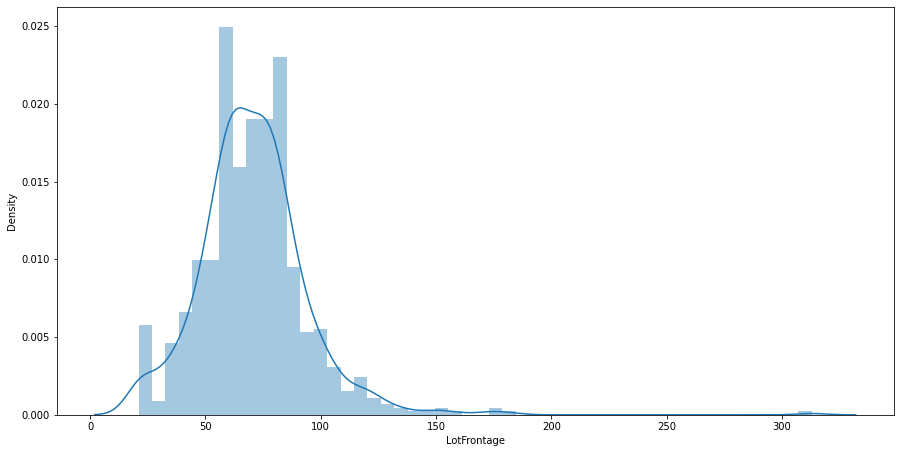

In [14]:
sns.distplot(train['LotFrontage']);

In [15]:
train = train.fillna(train['LotFrontage'].mean().round(0))
test = test.fillna(test['LotFrontage'].mean().round(0))

In [16]:
train.isnull().sum().max()
test.isnull().sum().max()



0

#### Correlation Matrix

In [17]:
#correlation matrix
corr_matrix = train.corr().sort_values(
    by = "SalePrice",  ascending=False, key = abs)
corr_matrix

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
SalePrice,1.000000,-0.038735,-0.094165,0.357624,0.242518,0.781560,-0.069757,0.487477,0.498255,0.463583,...,0.590936,0.313982,0.345674,-0.126933,0.056431,0.082110,0.136002,-0.017316,0.031515,-0.031679
OverallQual,0.781560,-0.062791,0.042839,0.206992,0.064353,1.000000,-0.118799,0.557417,0.557036,0.399401,...,0.509051,0.225220,0.341553,-0.125728,0.045946,0.048372,0.073089,-0.031180,0.055426,-0.024088
GrLivArea,0.729234,-0.000663,0.057949,0.327705,0.212327,0.575575,-0.075478,0.161393,0.262510,0.373118,...,0.449155,0.230269,0.364173,0.032512,0.019837,0.092121,0.163166,0.000256,0.040716,-0.050873
TotalBsmtSF,0.645187,-0.054095,-0.272076,0.314925,0.233564,0.508314,-0.209943,0.392366,0.262425,0.350250,...,0.504958,0.216322,0.268315,-0.117939,0.053754,0.060921,0.078333,-0.003232,0.014963,0.012837
1stFlrSF,0.629521,-0.011989,-0.263938,0.378828,0.252712,0.480277,-0.121804,0.260918,0.233857,0.327400,...,0.495137,0.217692,0.248161,-0.057162,0.057400,0.076815,0.067731,-0.011995,0.032904,-0.000977
GarageCars,0.615772,0.031730,0.000518,0.285323,0.119624,0.570456,-0.232592,0.500967,0.452156,0.342400,...,0.830692,0.184819,0.260226,-0.132584,0.031185,-0.008435,0.012004,-0.054424,-0.015810,-0.040659
GarageArea,0.590936,0.025566,-0.072286,0.310733,0.133231,0.509051,-0.202678,0.424257,0.374583,0.338256,...,1.000000,0.176569,0.297071,-0.089157,0.015428,-0.005092,0.044099,-0.031562,-0.015133,-0.030046
FullBath,0.555588,0.002085,0.101890,0.187716,0.110180,0.561052,-0.191191,0.474262,0.457246,0.258043,...,0.406793,0.177881,0.294054,-0.135665,0.074739,-0.016128,0.076934,-0.023932,0.049483,-0.003665
TotRmsAbvGrd,0.516455,0.025936,0.013947,0.309150,0.152775,0.399770,-0.049998,0.054134,0.138070,0.265718,...,0.343939,0.143282,0.281346,0.019088,-0.013146,0.051369,0.097970,0.030974,0.037891,-0.056066
YearRemodAdd,0.498255,-0.006910,0.033253,0.077469,-0.006366,0.557036,0.053142,0.620210,1.000000,0.155195,...,0.374583,0.207084,0.242098,-0.229408,0.040749,-0.076733,-0.000314,0.003834,0.026191,0.037678


<AxesSubplot:>

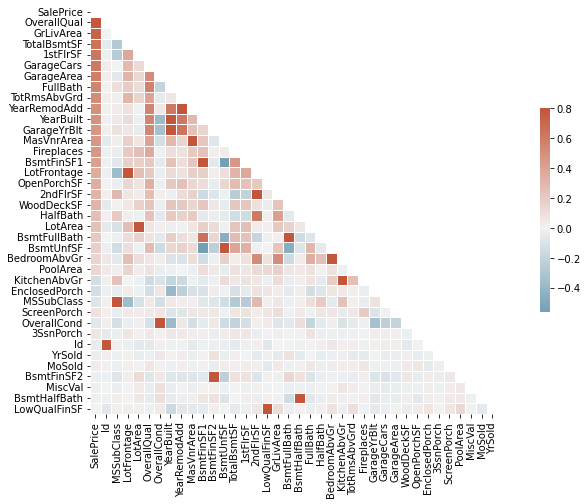

In [18]:

#sns.heatmap(corrmat, vmax=.8, square=True);

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax = 0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### For simplicity of exposition, I'm gonna focus on the 3 variables with higher absolute correlation with SalePrice

In [19]:
train['SalePrice']

379     179000
1366    193000
507     208300
256     207500
1084    187500
         ...  
7       200000
685     207500
700     312500
839     130500
1139    144000
Name: SalePrice, Length: 940, dtype: int64

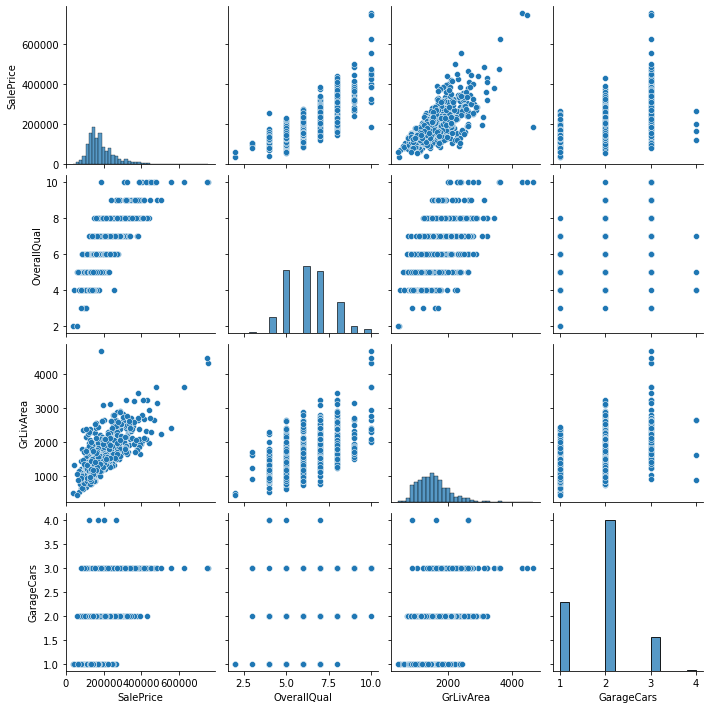

In [20]:
y_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
features = y_features[1:]

sns.pairplot(train[y_features])

#### Let's take a close look into our dependent variable
 Here I will use Seaborn : https://seaborn.pydata.org/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


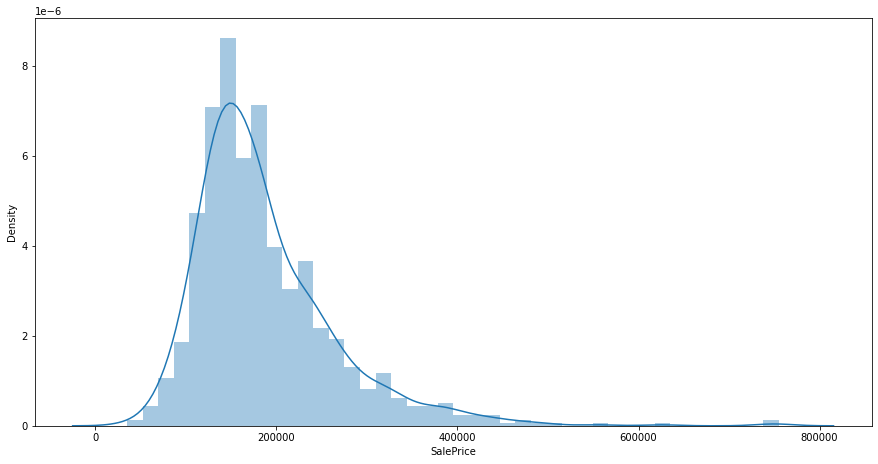

In [21]:
sns.distplot(train['SalePrice']);

#### And now lets focus on how OverallQual relates to SalePrice

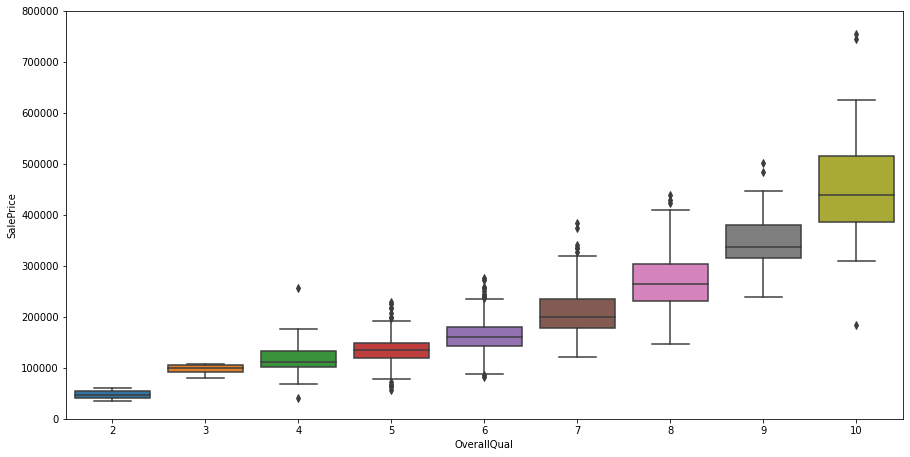

In [22]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

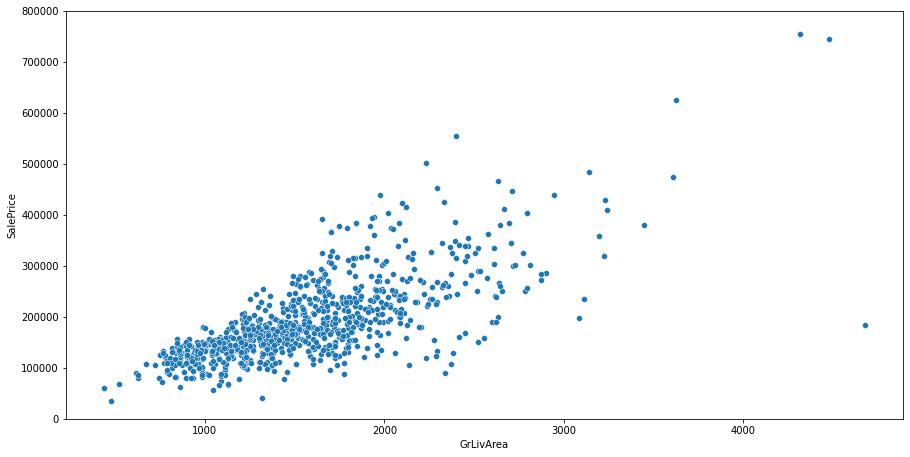

In [23]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

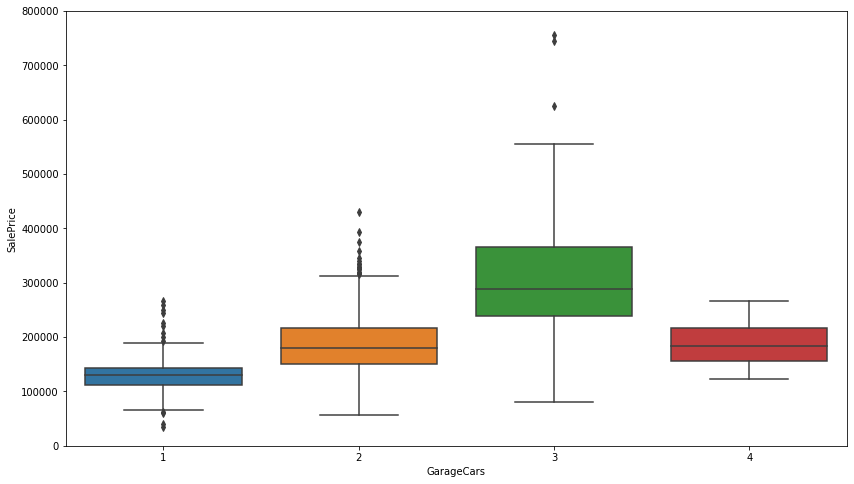

In [24]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

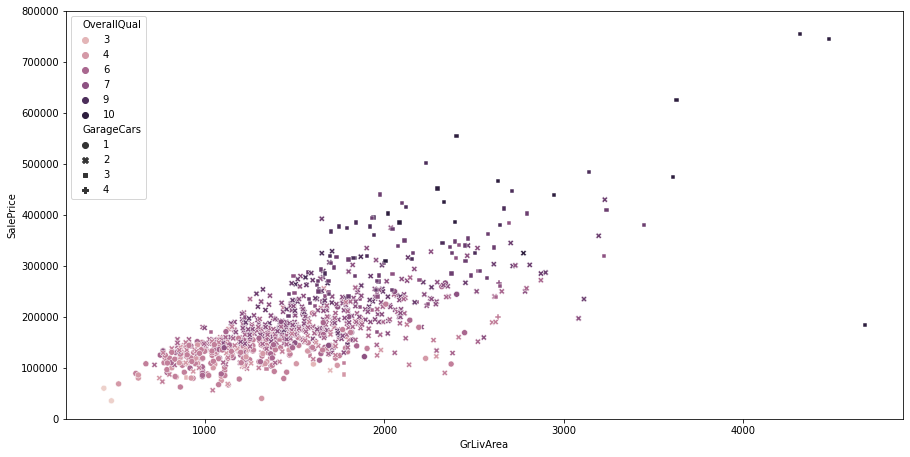

In [25]:
var = 'GrLivArea'
var2=  'OverallQual'
var3 = 'GarageCars'
data = pd.concat([train['SalePrice'], train[[var, var2,var3]]], axis=1)
fig = sns.scatterplot(x=var, y="SalePrice", hue = var2,style = var3, data=data)
fig.axis(ymin=0, ymax=800000);

## II-a) Log Transforming (Normalizing the data)

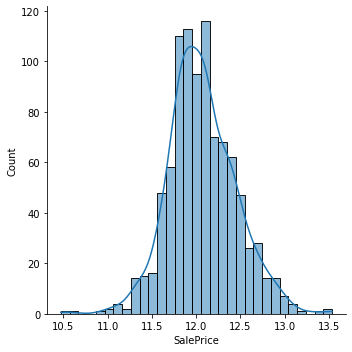

In [26]:
#sns.displot(  train['SalePrice'], kde=True);
sns.displot( np.log( train['SalePrice']), kde=True);

In [27]:
#train['SalePrice'] = np.log(train['SalePrice'])

A second option would be to normalize the data. Let's do it:

In [28]:
train['SalePrice'] = (train['SalePrice']  -train['SalePrice'] .mean())/train['SalePrice'] .std()

test['SalePrice'] = (test['SalePrice']  -test['SalePrice'] .mean())/test['SalePrice'] .std()

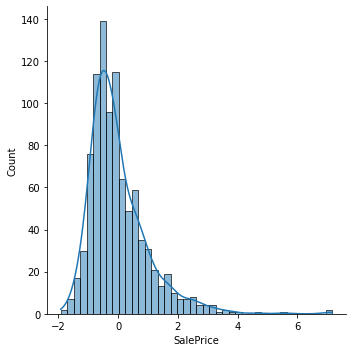

In [29]:
#sns.displot(  train['SalePrice'], kde=True);
sns.displot( train['SalePrice'], kde=True);

### I end this section spliting our training set  between X and y. 
I also save the feature names, which will be used later on to plot trees results.


In [30]:
X_train = train.drop('SalePrice', axis = 1)
X_test = test.drop('SalePrice', axis = 1)

y_train = train['SalePrice']
y_test = test['SalePrice']

# 3 - Outlier Detection

## Manual


Define the rule

In [31]:
n = 3

upper_limit = train['SalePrice'].mean() + n*train['SalePrice'].std()
lower_limit = train['SalePrice'].mean() - n*train['SalePrice'].std()

print("Highest allowed", upper_limit)
print("Lowest allowed", lower_limit)


Highest allowed 3.0
Lowest allowed -3.0


Implement the rule - Trimming


In [32]:
train_trimmed = train[
    ( train['SalePrice'] < upper_limit ) & 

    ( train['SalePrice'] > lower_limit )
    ]

In [33]:
train_trimmed.shape

(926, 76)

Implementing the rule - Censoring

In [34]:
train_censored = pd.DataFrame()

train_censored['SalePrice'] =  np.where(
    train['SalePrice'] > upper_limit,
        upper_limit,
        np.where(
            train['SalePrice'] < lower_limit, # Condition
            lower_limit,                   # Assign If TRUE
            train['SalePrice']                # Assign If FALSE
            )
        )


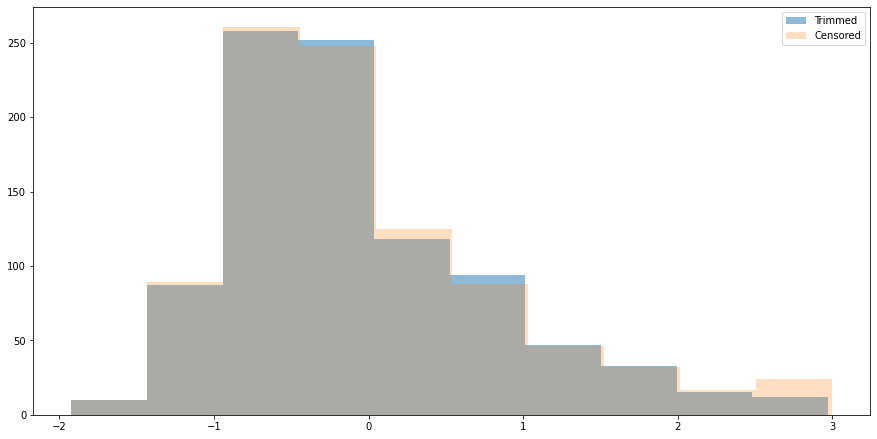

In [35]:
#plt.hist(train['SalePrice'], alpha=1, label='Original Data')
plt.hist(train_trimmed['SalePrice'], alpha=0.5, label='Trimmed')
plt.hist(train_censored['SalePrice'], alpha=0.25, label='Censored')

plt.legend(loc='upper right')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

X_list = ['GrLivArea', 'OverallQual', 'GarageCars']

linear_reg = LinearRegression()

linear_reg.fit(X_train[X_list], y_train)

y_pred_in = linear_reg.predict(X_train[X_list])
y_pred_out = linear_reg.predict(X_test[X_list])


In [37]:
print('Intercept')
print(linear_reg.intercept_)

print('Coefficients')
print(linear_reg.coef_)

Intercept
-3.8065598891213313
Coefficients
[0.00072925 0.3493479  0.26412055]


In [38]:
type(y_pred_in)

numpy.ndarray

In [39]:
in_sample_results = pd.DataFrame({
    'Actual': y_train, 
    'Pred': y_pred_in,
    'Error': y_pred_in - y_train,
    'Percent_Error': 100*(y_pred_in - y_train)/y_train
    })

out_sample_results = pd.DataFrame({
    'Actual': y_test, 
    'Pred': y_pred_out,
    'Error': y_pred_out - y_test,
    'Percent_Error': 100*(y_pred_out - y_test)/y_test
    })    



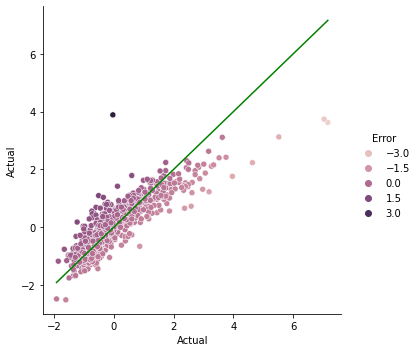

In [40]:

p = sns.relplot( 
    kind = 'scatter',
    x = in_sample_results['Actual'], 
    y = in_sample_results['Pred'], 
    hue = in_sample_results['Error']
    
)


p.map_dataframe(sns.lineplot, 'Actual', 'Actual', color='g')


<AxesSubplot:ylabel='Error'>

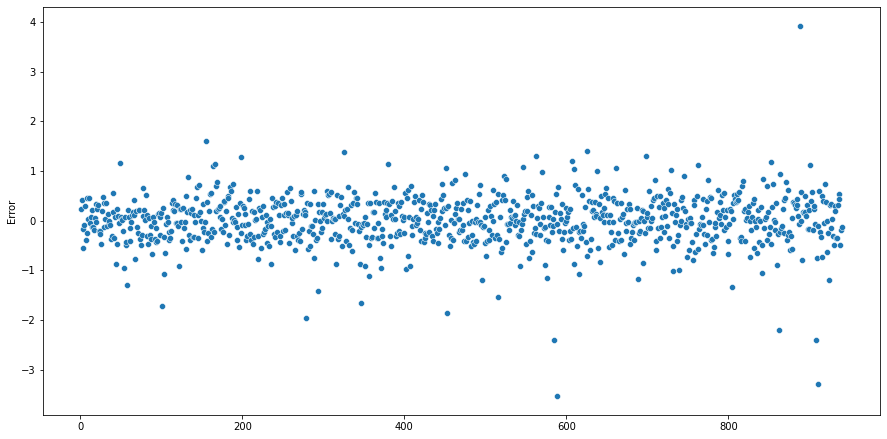

In [41]:

sns.scatterplot( 
    
    x = np.linspace(1,in_sample_results.shape[0],in_sample_results.shape[0]),
    y = in_sample_results['Error'], 
  
)

<AxesSubplot:xlabel='Percent_Error', ylabel='Count'>

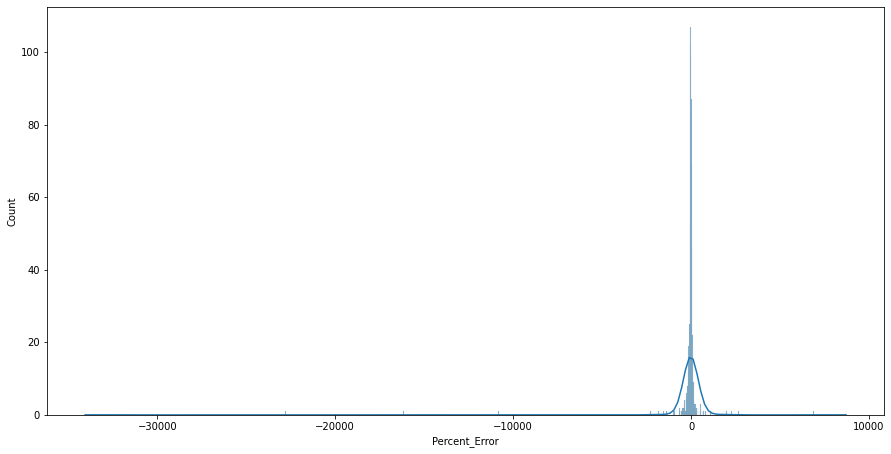

In [42]:
# Histogram with estimated kernel density 
sns.histplot(data = in_sample_results, x = 'Percent_Error', kde=True)

In [43]:
upper_limit = 55
in_sample_results['Detected_Outliers'] =  np.where(
    np.absolute(in_sample_results['Percent_Error']) > upper_limit, 1 , 0
        )

In [44]:
in_sample_results

,Actual,Pred,Error,Percent_Error,Detected_Outliers
379,-0.108836,0.130424,0.239260,-219.834876,1
1366,0.067958,0.472479,0.404521,595.252184,1
507,0.261169,-0.294001,-0.555170,-212.571399,1
256,0.251066,0.077918,-0.173149,-68.965322,1
1084,-0.001497,-0.089811,-0.088314,5899.687772,1
...,...,...,...,...,...
7,0.156355,0.691255,0.534900,342.105928,1
685,0.251066,0.691255,0.440189,175.327725,1
700,1.577023,1.093240,-0.483783,-30.676970,0
839,-0.721302,-0.920596,-0.199294,27.629806,0


<AxesSubplot:ylabel='Percent_Error'>

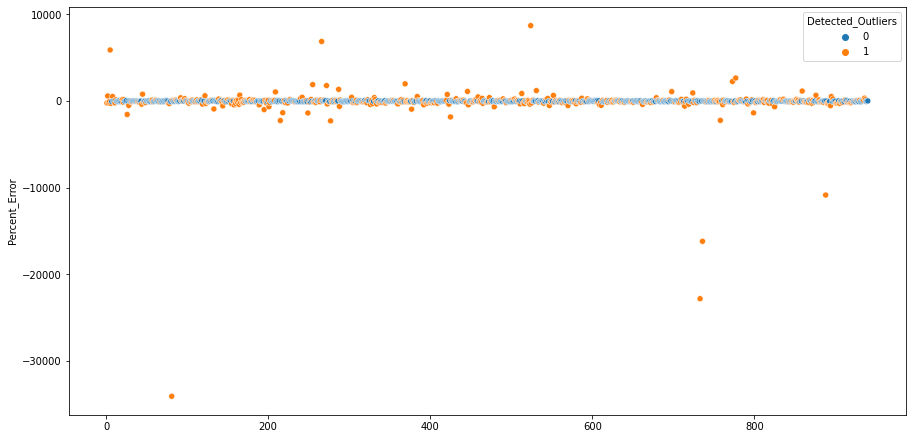

In [45]:
sns.scatterplot(     
    x = np.linspace(1,in_sample_results.shape[0],in_sample_results.shape[0]),
    y = in_sample_results['Percent_Error'],
    hue = in_sample_results['Detected_Outliers']  
)

<AxesSubplot:xlabel='Percent_Error', ylabel='Count'>

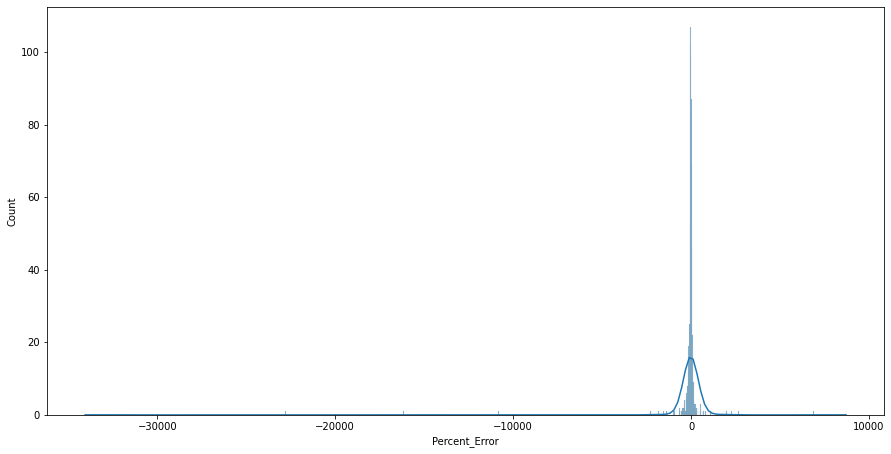

In [46]:
# Histogram with estimated kernel density 
sns.histplot(data = in_sample_results, x = 'Percent_Error', kde=True)

In [47]:
outliers = in_sample_results[in_sample_results['Detected_Outliers'] == 1]['Detected_Outliers']

In [48]:
outliers.index

Int64Index([ 379, 1366,  507,  256, 1084, 1245,  794,  104,  266,   62,
            ...
             603,  522,  516,  285, 1361,  290,  656,  470,    7,  685],
           dtype='int64', length=402)

In [49]:
outliers.shape


(402,)

In [50]:
train = train.drop( outliers.index, axis = 0)

#Update X and y
X_train = train.drop('SalePrice', axis = 1)

y_train = train['SalePrice']


<AxesSubplot:ylabel='Percent_Error'>

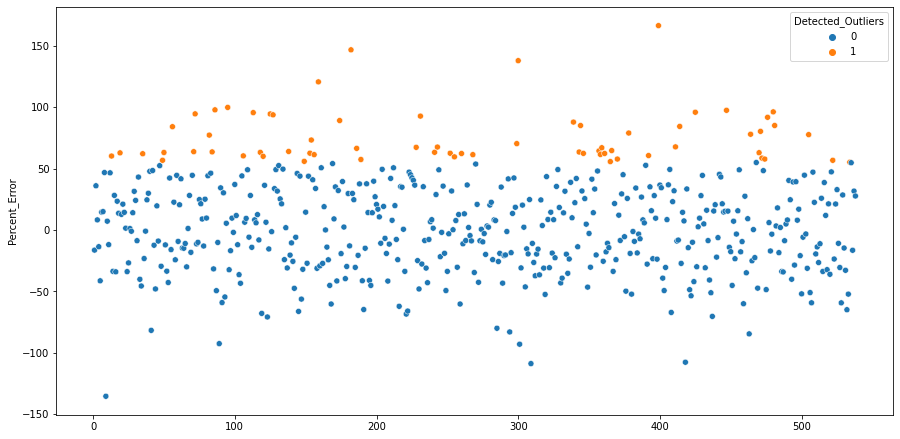

In [51]:
linear_reg = LinearRegression()

linear_reg.fit(X_train[X_list], y_train)

y_pred_in = linear_reg.predict(X_train[X_list])

in_sample_results = pd.DataFrame({
    'Actual': y_train, 
    'Pred': y_pred_in,
    'Error': y_pred_in - y_train,
    'Percent_Error': 100*(y_pred_in - y_train)/y_train
    })


in_sample_results['Detected_Outliers'] =  np.where(
     in_sample_results['Percent_Error'] > upper_limit, 1 , 0)

sns.scatterplot(     
    x = np.linspace(1,in_sample_results.shape[0],in_sample_results.shape[0]),
    y = in_sample_results['Percent_Error'],
    hue = in_sample_results['Detected_Outliers']  
)



<AxesSubplot:xlabel='Percent_Error', ylabel='Count'>

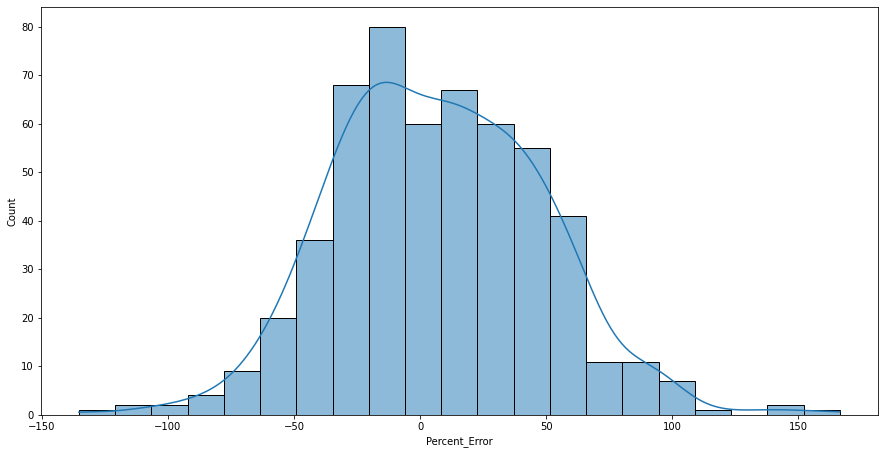

In [52]:
# Histogram with estimated kernel density 
sns.histplot(data = in_sample_results, x = 'Percent_Error', kde=True)

# Encoding

In [53]:
train.select_dtypes(include=['object'])


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1372,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,RFn,TA,TA,Y,WD,Normal
797,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml
935,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
611,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
579,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,FuseF,TA,Typ,Attchd,Unf,Fa,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
719,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
700,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
839,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal


In [54]:
train.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

Manual Replacement

In [55]:
tmp = train.replace(
    {"LotShape": { "Reg": 0, 
                  "IR1": 1, 
                  "IR2": 2, 
                  "IR3": 3 }}                
                  ).LotShape

tmp .unique()              

array([0, 1, 2, 3])

In [56]:
tmp

1372    0
797     0
935     1
611     1
579     0
       ..
904     1
719     1
700     0
839     0
1139    1
Name: LotShape, Length: 538, dtype: int64

In [57]:
tmp = train["LotShape"].astype('category')
tmp = tmp.cat.codes
tmp.unique()

array([3, 0, 1, 2], dtype=int8)

Create Dummy variables for the categorical features

In [58]:
LotShape = train.LotShape
pd.get_dummies(LotShape)


,IR1,IR2,IR3,Reg
1372,0,0,0,1
797,0,0,0,1
935,1,0,0,0
611,1,0,0,0
579,0,0,0,1
...,...,...,...,...
904,1,0,0,0
719,1,0,0,0
700,0,0,0,1
839,0,0,0,1


In [59]:
X_train = pd.get_dummies(X_train)

X_test = pd.get_dummies(X_test)

In [60]:
X_train.shape

(538, 247)

In [61]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1372,1373,60,75.0,9750,7,6,1998,1998,0.0,975,...,0,0,0,0,1,0,0,0,1,0
797,798,20,57.0,7677,5,5,1953,1953,0.0,570,...,0,0,0,0,1,1,0,0,0,0
935,936,30,52.0,5825,4,5,1926,1953,108.0,0,...,0,0,0,0,1,0,0,0,1,0
611,612,80,71.0,10395,6,6,1978,1978,233.0,605,...,0,0,0,0,1,0,0,0,1,0
579,580,50,81.0,12150,5,5,1954,1954,335.0,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
X_test.shape

(438, 258)

# Modeling

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

Just for simplicity, I'll use only the top 3 numerical variables

In [64]:
X_list = ['GrLivArea', 'OverallQual', 'GarageCars']

X_train = X_train[X_list]
X_test = X_test[X_list]

In [65]:

# 1) Start Models
linear = LinearRegression()
dtr = DecisionTreeRegressor( max_depth = 5)
dtr_noprune = DecisionTreeRegressor( )
rfr = RandomForestRegressor(n_estimators=100, max_depth= 5)
gbr = GradientBoostingRegressor()

# 2) Fit  
linear.fit(X_train, y_train)
dtr.fit(X_train, y_train)
dtr_noprune.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# 3) Predict
pred_linear = linear.predict(X_test)
pred_dtr = dtr.predict(X_test)
pred_dtr_noprune = dtr_noprune.predict(X_test)
pred_rfr = rfr.predict(X_test)
pred_gbr = gbr.predict(X_test)

Compute Accuracy

In [66]:
accuracy = pd.DataFrame({'explained variance': explained_variance_score(y_test, pred_dtr),
                    'mean abs error': mean_absolute_error(y_test,pred_dtr) ,
                    'median abs error':median_absolute_error(y_test, pred_dtr),
                    'r2': r2_score(y_test,pred_dtr)},
                    index = ['Tree']
                    )


accuracy.loc['No Prune'] = [explained_variance_score(y_test, pred_dtr_noprune),
                            mean_absolute_error(y_test,pred_dtr_noprune) ,
                            median_absolute_error(y_test, pred_dtr_noprune),
                            r2_score(y_test,pred_dtr_noprune)]

accuracy.loc['Linear Reg'] = [explained_variance_score(y_test, pred_linear),
                            mean_absolute_error(y_test,pred_linear) ,
                            median_absolute_error(y_test, pred_linear),
                            r2_score(y_test, pred_linear)]

accuracy.loc['Random Forest'] = [explained_variance_score(y_test, pred_rfr),
                            mean_absolute_error(y_test,pred_rfr) ,
                            median_absolute_error(y_test, pred_rfr),
                            r2_score(y_test, pred_rfr)]                            

accuracy.loc['Gradient Boosting'] = [explained_variance_score(y_test, pred_gbr),
                            mean_absolute_error(y_test,pred_gbr) ,
                            median_absolute_error(y_test, pred_gbr),
                            r2_score(y_test, pred_gbr)]   

accuracy.round(2)

,explained variance,mean abs error,median abs error,r2
Tree,0.66,0.36,0.28,0.65
No Prune,0.65,0.36,0.25,0.64
Linear Reg,0.67,0.40,0.33,0.66
Random Forest,0.68,0.35,0.28,0.68
Gradient Boosting,0.71,0.33,0.26,0.70


In [67]:
values = pd.DataFrame({'Actual': y_test,
                    'Tree': pred_dtr ,
                    'Tree no Prune': pred_dtr_noprune,
                    'Linear Reg': pred_linear,
                    'Random Forest': pred_rfr,
                    'Gradient Boosting': pred_gbr})

values

,Actual,Tree,Tree no Prune,Linear Reg,Random Forest,Gradient Boosting
693,-0.874587,-0.861498,-1.201172,-1.064229,-0.906392,-0.936775
25,0.973759,1.161879,1.256142,1.138334,0.986638,1.044242
1064,-0.305403,-0.861498,-0.601966,-0.715286,-0.795098,-0.712207
1140,-0.492964,-0.861498,-0.696046,-0.896661,-0.798665,-0.754882
1073,-0.236631,-0.188482,-0.097471,-0.078743,-0.208366,-0.255836
...,...,...,...,...,...,...
1110,0.119734,-0.188482,0.074272,0.129570,-0.189711,-0.097953
966,-0.230379,-0.861498,-0.954923,-0.853222,-0.852922,-0.858119
945,-0.669271,-0.566213,-0.411912,-0.073288,-0.451692,-0.338889
286,-0.242883,-0.188482,0.129836,0.197810,-0.146593,-0.081823


In [68]:
values_melt = pd.melt(
    values,
    id_vars = 'Actual'

)
values_melt

,Actual,variable,value
0,-0.874587,Tree,-0.861498
1,0.973759,Tree,1.161879
2,-0.305403,Tree,-0.861498
3,-0.492964,Tree,-0.861498
4,-0.236631,Tree,-0.188482
...,...,...,...
2185,0.119734,Gradient Boosting,-0.097953
2186,-0.230379,Gradient Boosting,-0.858119
2187,-0.669271,Gradient Boosting,-0.338889
2188,-0.242883,Gradient Boosting,-0.081823


<AxesSubplot:xlabel='Actual', ylabel='value'>

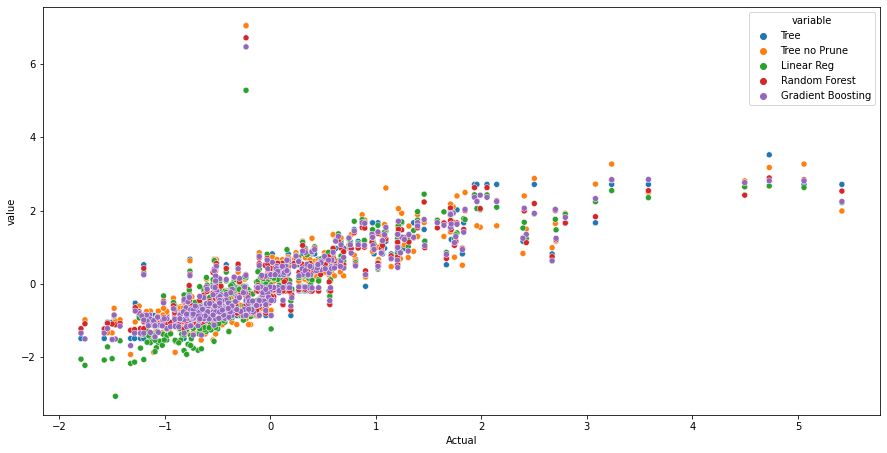

In [69]:
sns.scatterplot(
    x = values_melt['Actual'],
    y = values_melt['value'],
    hue = values_melt['variable']
)

## III-b) Classification

Now we are going deal with a classification problem, instead of the regression case that we dealt so far,

Let's beging by creating a discrete version of our response variable. To do so, I will divide the data into quartiles, such that:

* "Low / 0" if prices $\in (0, 25\%)$
* "Medium-Low / 1" if prices $\in [25, 50\%)$
* "Medium-High / 2" if prices $\in [50, 75\%)$
* "High / 3" if prices $\in [75, 100\%)$



In [70]:
y_4_class_train = pd.qcut(y_train,q = 4, labels = ["0", "1","2", "3"])
y_4_class_test = pd.qcut(y_test,q = 4, labels = ["0", "1","2", "3"])


y_4_class_train.value_counts()




2    137
0    135
1    134
3    132
Name: SalePrice, dtype: int64

#### SalePrice vs OverallQuall vs Price Category

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

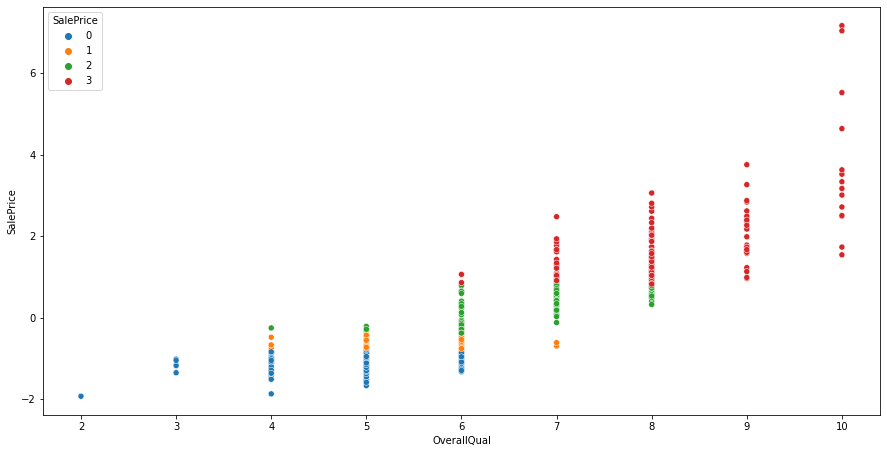

In [71]:
sns.scatterplot(x =  X_train['OverallQual'],
                y = y_train,
                hue = y_4_class_train)
                

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [73]:
# 1) Start Models

dtc = DecisionTreeClassifier( max_depth = 5)
dtc_noprune = DecisionTreeClassifier( )
rfc = RandomForestClassifier(n_estimators=100, max_depth= 5)
gbc = GradientBoostingClassifier()

# 2) Fit  
dtc.fit(X_train, y_4_class_train)
dtc_noprune.fit(X_train, y_4_class_train)
rfc.fit(X_train, y_4_class_train)
gbc.fit(X_train, y_4_class_train)

# 3) Predict

pred_dtc_4 = dtc.predict(X_test)
pred_dtc_noprune_4 = dtc_noprune.predict(X_test)
pred_rfc_4 = rfc.predict(X_test)
pred_gbc_4 = gbc.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_4_class_test, pred_dtc_4),
                    'Decision Tree no prune': accuracy_score(y_4_class_test,pred_dtc_noprune_4) ,
                    'Random Forest':accuracy_score(y_4_class_test, pred_rfc_4),
                    'Gradient Boosting': accuracy_score(y_4_class_test,pred_gbc_4)},
                    index=[0]                    )

accuracy

,Decision Tree,Decision Tree no prune,Random Forest,Gradient Boosting
0,0.634703,0.618721,0.646119,0.643836


In [75]:
cm = confusion_matrix(y_4_class_test, pred_rfc_4)


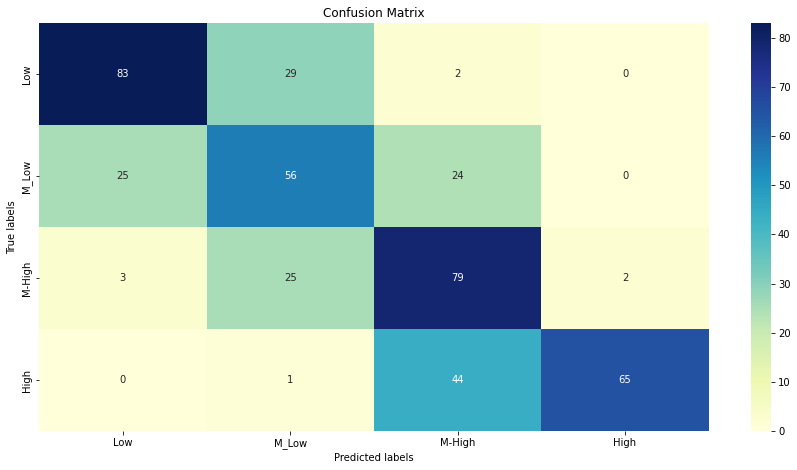

In [76]:
labels = ["Low", "M_Low", "M-High","High"]

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


Accuracy Measures for classification

In [77]:
y_2_class_train = pd.qcut(y_train,q = 2, labels = ["0", "1"])
y_2_class_test = pd.qcut(y_test,q = 2, labels = ["0", "1"])

# 1) Start Model & Fit
rfc = RandomForestClassifier(n_estimators=100, max_depth= 5).fit(X_train, y_2_class_train)

# 3) Predict

pred_rfc_2 = rfc.predict(X_test)
pred_gbc_2 = gbc.predict(X_test)

cm = confusion_matrix(y_2_class_test, pred_rfc_2)



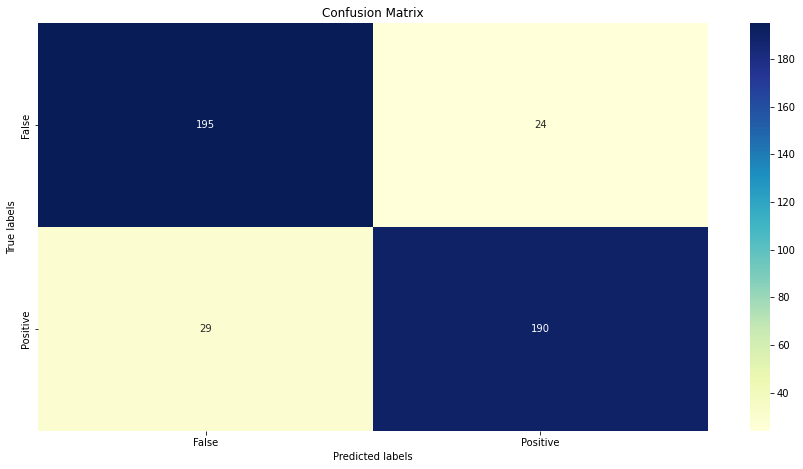

In [78]:
labels = ["False", "Positive"]

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

From the *Confusion Matrix*, we can calculate three performance metrics: precision, recall, and accuracy.

Precision is the ratio of true positive predictions to the overall number of positive predictions: 
$$ precision = TP / (TP + FP)$$

* Intuitively, precision measures the ability of the classifier not to label as positive a sample that is negative.


Recall is the ratio of true positive predictions to the overall number of positive examples:
$$ recall = TP/(TP+FN)$$ 

* Intuitively, recall measures the ability of the classifier to find all the positive sample



In practice, we choose between high precision or high recall. It's virtually impossible to have both. This is called the **precision-recall tradeoff** . 

As always, the choice of giving more attentio to the *precision* or to the *recall* result will depend on the use case. 

* In spam detection, we want to have high precision, to avoid wrongly placing a legitimate message in our spam folder. We are willing to tolerate lower recall, since we can deal with some spam messages in our inbox.




Two main ways to optimize for precision or recall:

* Tuning hyperparameters to maximize either precision or recall on the validation set;
* Varying the decision threshold for algorithms that return prediction scores. *For example, to increase precision (at the cost of a lower recall), we can decide that the prediction will be positive only if the score returned by the model is higher than 0.9* 

Implementing

$$ precision = TP / (TP + FP)$$
$$ recall = TP/(TP+FN)$$ 

In [ ]:
precision = 202/(202+36)
recall = 202/(202+16)

In [ ]:
print('Precision: ', np.round(precision,2))
print('Recall: ', np.round(recall,2))

In [ ]:
from sklearn.metrics import recall_score, precision_score

precision = precision_score( y_true = y_2_class_test, 
                             y_pred = pred_rfc_2, 
                             pos_label='1' )


recall = recall_score( y_true = y_2_class_test, 
                             y_pred = pred_rfc_2, 
                             pos_label='1' )

print('Precision: ', np.round(precision,2))
print('Recall: ', np.round(recall,2))                             

### Classification Report

In [ ]:
from sklearn.metrics import classification_report



# Going back to the 4 classes case
class_report = classification_report(
    y_4_class_test, 
    pred_rfc_4, 
    target_names = ["Low", "M_Low", "M-High","High"])

print(class_report)

Probabilities

In [ ]:
from sklearn.metrics import precision_recall_curve
pred_proba =  rfc.predict_proba(X_test)


rfc_predictions = pd.DataFrame({
    'Probability of False': pred_proba[:,0],
    'Probility. of True': pred_proba[:,1],
    'Class Prediction': pred_rfc_2 == "1"
        })

rfc_predictions




